In [21]:

# Pending Installations 
!pip install scikit le


ERROR: Could not find a version that satisfies the requirement train_test_spilt (from versions: none)
ERROR: No matching distribution found for train_test_spilt

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as data
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [48]:
#it means the output of plotting commands is displayed inline .
%matplotlib inline

In [110]:
 ticker = "TCS.NS" #Enter Stock Ticker Here 
 start_date = "2022-10-10" #Duration 
 end_date = "2023-10-18"

 stock = yf.download(ticker, start=start_date , end = end_date )
 print(data)
 stock.to_csv(f"ticker_data.csv")
 stock = pd.read_csv('ticker_data.csv')
 stock.head()

[*********************100%%**********************]  1 of 1 completed
<module 'pandas_datareader' from 'C:\\Users\\athar\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\pandas_datareader\\__init__.py'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,3010.000000,3127.000000,3005.000000,3118.550049,3018.387207,3064063
1,2022-10-11,3100.000000,3145.000000,3053.350098,3069.550049,2970.960693,4730645
2,2022-10-12,3084.899902,3109.899902,3062.050049,3100.750000,3001.158691,1665247
3,2022-10-13,3100.750000,3110.000000,3052.350098,3103.300049,3003.626953,2054781
4,2022-10-14,3145.000000,3150.000000,3071.000000,3099.149902,2999.609863,2245977


In [111]:
 stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2023-10-11,3650.0,3650.000000,3605.000000,3609.899902,3609.899902,2426417
250,2023-10-12,3575.0,3588.649902,3538.100098,3542.550049,3542.550049,4241281
251,2023-10-13,3530.0,3577.000000,3525.000000,3570.850098,3570.850098,2890357
252,2023-10-16,3566.0,3574.649902,3519.100098,3524.050049,3524.050049,1671104
253,2023-10-17,3530.0,3534.149902,3503.350098,3507.050049,3507.050049,1672065


In [93]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [94]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [95]:
print(f'Dataframe contains stock price between {stock.Date.min()} {stock.Date.max()}')
print(f'Total Days = {(stock.Date.max() - stock.Date.min()).days}')

Dataframe contains stock price between 2022-10-10 00:00:00 2023-10-09 00:00:00
Total Days = 364


In [96]:
stock.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2023-04-08 16:03:52.258064640,3325.645767,3350.943943,3299.395171,3327.246773,3286.352575,1.856199e+06
min,2022-10-10 00:00:00,3010.000000,3109.899902,3005.000000,3069.550049,2970.960938,0.000000e+00
25%,2023-01-05 18:00:00,3228.275085,3255.600098,3204.875061,3226.487488,3177.197632,1.325038e+06
50%,2023-04-10 12:00:00,3316.625000,3339.299927,3291.000000,3319.949951,3263.862793,1.656054e+06
75%,2023-07-10 06:00:00,3414.962463,3436.037476,3383.537537,3414.075012,3395.925781,2.058496e+06
max,2023-10-09 00:00:00,3645.050049,3679.000000,3631.000000,3638.350098,3638.350098,6.739966e+06
std,NaN,126.527426,128.321806,127.354397,128.707606,147.455307,9.113451e+05


<Axes: >

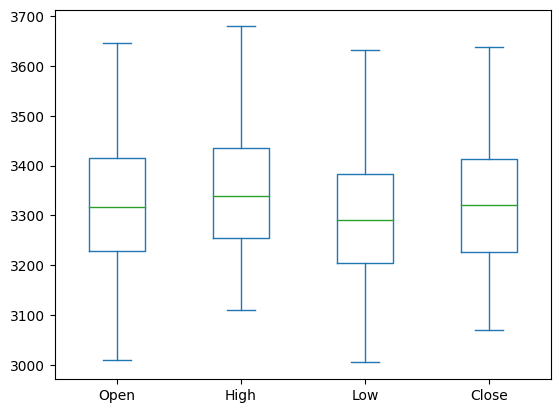

In [97]:
stock[['Open','High','Low','Close']].plot(kind='box')

In [98]:
#setting layout for our plot
layout = go.Layout(
    title='Stock Prices ',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

stock_data = [{'x':stock['Date'] , 'y':stock['Close']}]
plot = go.Figure(data=stock_data , layout=layout)

C:\Users\athar\AppData\Local\Programs\Python\Python311\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



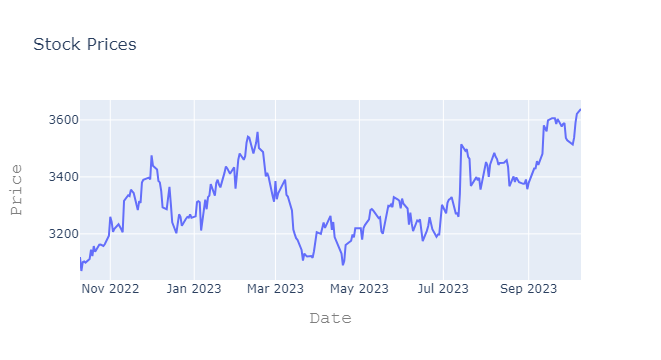

In [99]:
iplot(plot)

In [100]:
#Building Linear Regression Model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [101]:
#Split the data into train and test sets 
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [102]:
#Feature  Scaling 
scaler = StandardScaler().fit(X_train)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [108]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)

trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'predicted'
)

stock_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data,layout=layout)

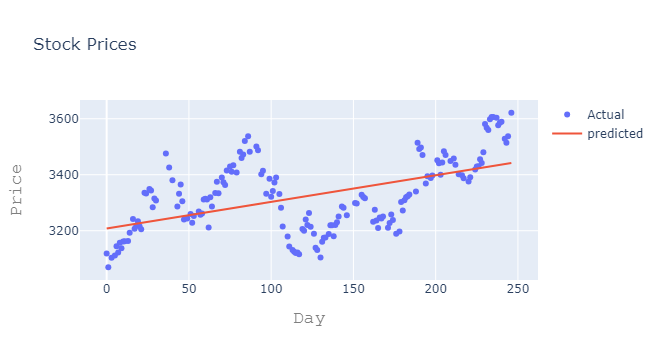

In [109]:
iplot(plot2)

In [107]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.27496107471310904	-0.016536266097046948
MSE       12424.493569130987	15246.777594690777

